# Google Stock Prediction

There are two data sets present for this project:
1. A Training Set
2. A Test Set

The model will be trained on the training set. Once fully trained, the model will be tested on the test set and the results will be visulaised.
The model will be trained on 5 years of data (2012/2016), with 1258 data entries. The data has the following columns:
1. Date
2. Open Price
3. High
4. Low
5. Close Price
6. Volume

## Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In C:\Users\Siya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Siya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Siya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Siya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Siya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [2]:
train_df = pd.read_csv('Google_Stock_Price_Train.csv', delimiter =';')
test_df = pd.read_csv('Google_Stock_Price_Test.csv')

In [3]:
train_df.head()

,Date,Open,High,Low,Close,Volume
0,2012/01/03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012/01/04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012/01/05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012/01/06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012/01/09,322.04,322.29,309.46,620.76,"11,688,800"


In [33]:
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null float64
Volume    1258 non-null object
dtypes: float64(4), object(2)
memory usage: 59.1+ KB


No missing values from the training data. We will try to predict the Closing Price of the Google Stock Price. 
We are dealing with timeseries data.

## Clean and Explore Data

We will need to drop the other columns. We will need the date and closing price only.

In [5]:
train_df.drop(['Open', 'High', 'Low', 'Volume'], inplace = True, axis = 1)

In [6]:
train_df.head()

,Date,Close
0,2012/01/03,663.59
1,2012/01/04,666.45
2,2012/01/05,657.21
3,2012/01/06,648.24
4,2012/01/09,620.76


In [7]:
train_df['Date']=pd.to_datetime(train_df['Date'], infer_datetime_format=True)

I need to plot the price and see how it changes with time

No handles with labels found to put in legend.


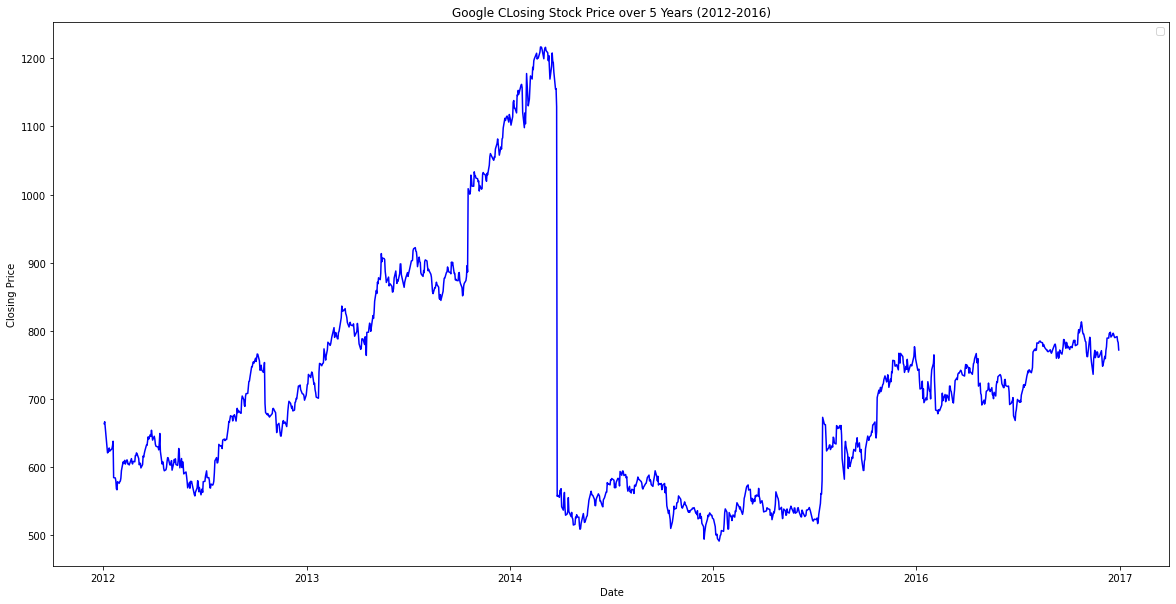

In [8]:
plt.figure(figsize=(20,10))
plt.plot(train_df['Date'], train_df['Close'], color = 'blue')
plt.title('Google CLosing Stock Price over 5 Years (2012-2016)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

Put the training data into a dataframe format.

In [9]:
train_set = pd.DataFrame(train_df)

In [10]:
train_set.head()

,Date,Close
0,2012-01-03,663.59
1,2012-01-04,666.45
2,2012-01-05,657.21
3,2012-01-06,648.24
4,2012-01-09,620.76


The columns need to changed, in order to work with Prophet
The date has to changed to ds and the closing price to y

In [11]:
ts_data = train_set.rename(columns = {'Date': 'ds', 'Close': 'y'})

In [12]:
ts_data.head()

,ds,y
0,2012-01-03,663.59
1,2012-01-04,666.45
2,2012-01-05,657.21
3,2012-01-06,648.24
4,2012-01-09,620.76


## Fit Prophet to data and Make Predictions

In [13]:
model = Prophet(daily_seasonality = True)

In [14]:
model.fit(ts_data)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
C:\Users\Siya\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


### Make Predictions

In [38]:
future = model.make_future_dataframe(periods = 365)

In [39]:
forecast = model.predict(future)

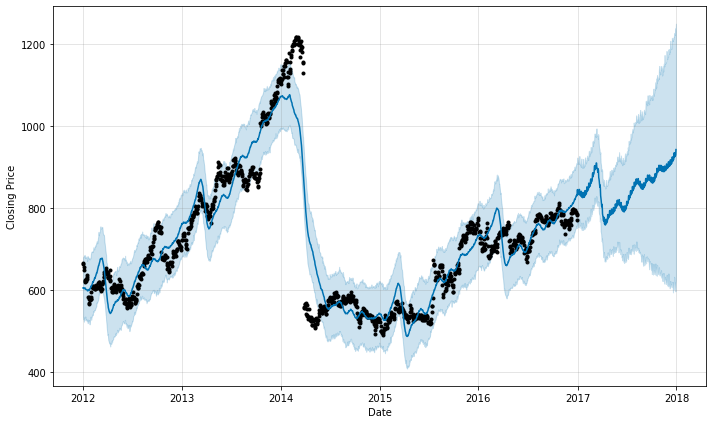

In [40]:
figure = model.plot(forecast, xlabel = 'Date',ylabel = 'Closing Price')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


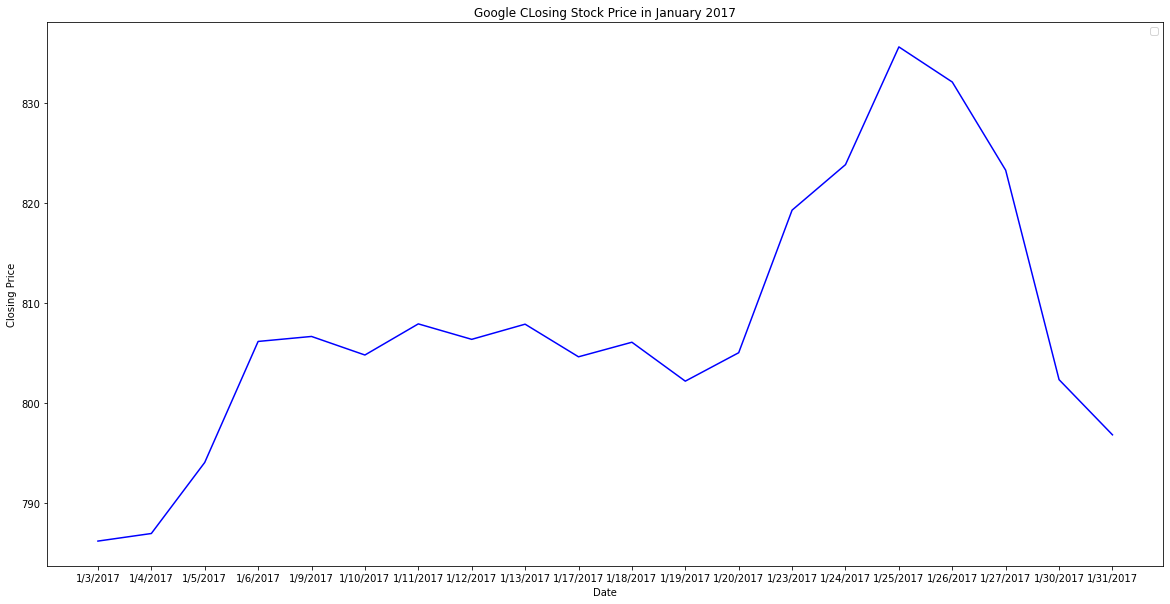

In [34]:
plt.figure(figsize=(20,10))
plt.plot(test_df['Date'], test_df['Close'], color = 'blue')
plt.title('Google CLosing Stock Price in January 2017')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

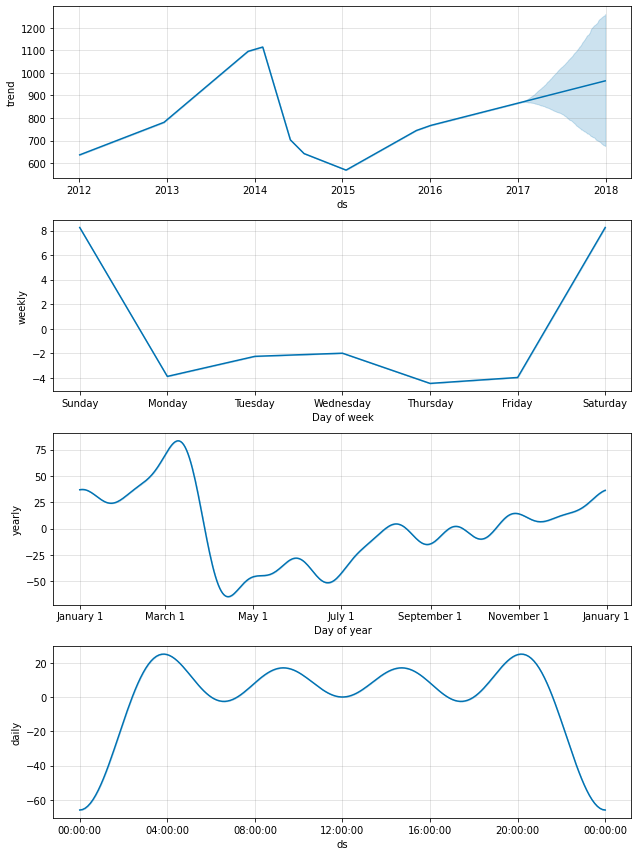

In [32]:
figure3 = model.plot_components(forecast)